In [1]:
import pandas as pd
import sqlite3

## 1

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## 2

In [30]:
commits = pd.io.sql.read_sql(
    """
    SELECT timestamp
    FROM checker
    WHERE uid LIKE "user_%";
    """,
    con=conn, parse_dates=['timestamp']
)

In [31]:
commits[['date', 'hour']] = commits['timestamp'].apply(lambda x: pd.Series([x.date(), x.time().hour]))
commits = commits.drop(columns=['timestamp'])
commits['hour'] = pd.to_numeric(commits['hour'].values, downcast='integer')
commits['day_of_time'] = pd.cut(commits['hour'], bins=[-0.1, 3.9, 9.9, 16.9, 23.9], labels=[
    'night', 'morning', 'afternoon', 'evening'])
commits = commits.drop(columns=['hour'])

In [34]:
commits = commits.groupby(by=['date', 'day_of_time'], observed=True)['day_of_time'].count().unstack()

In [35]:
commits

day_of_time,night,morning,afternoon,evening
date,,,,
2020-04-17,NaN,13.0,10.0,NaN
2020-04-18,NaN,1.0,33.0,35.0
2020-04-19,2.0,4.0,16.0,11.0
2020-04-20,NaN,NaN,12.0,13.0
2020-04-21,NaN,NaN,NaN,25.0
2020-04-22,NaN,NaN,4.0,24.0
2020-04-23,2.0,6.0,15.0,20.0
2020-04-24,NaN,NaN,4.0,12.0
2020-04-25,1.0,21.0,33.0,49.0


<Axes: title={'center': 'Commits per day'}, xlabel='date'>

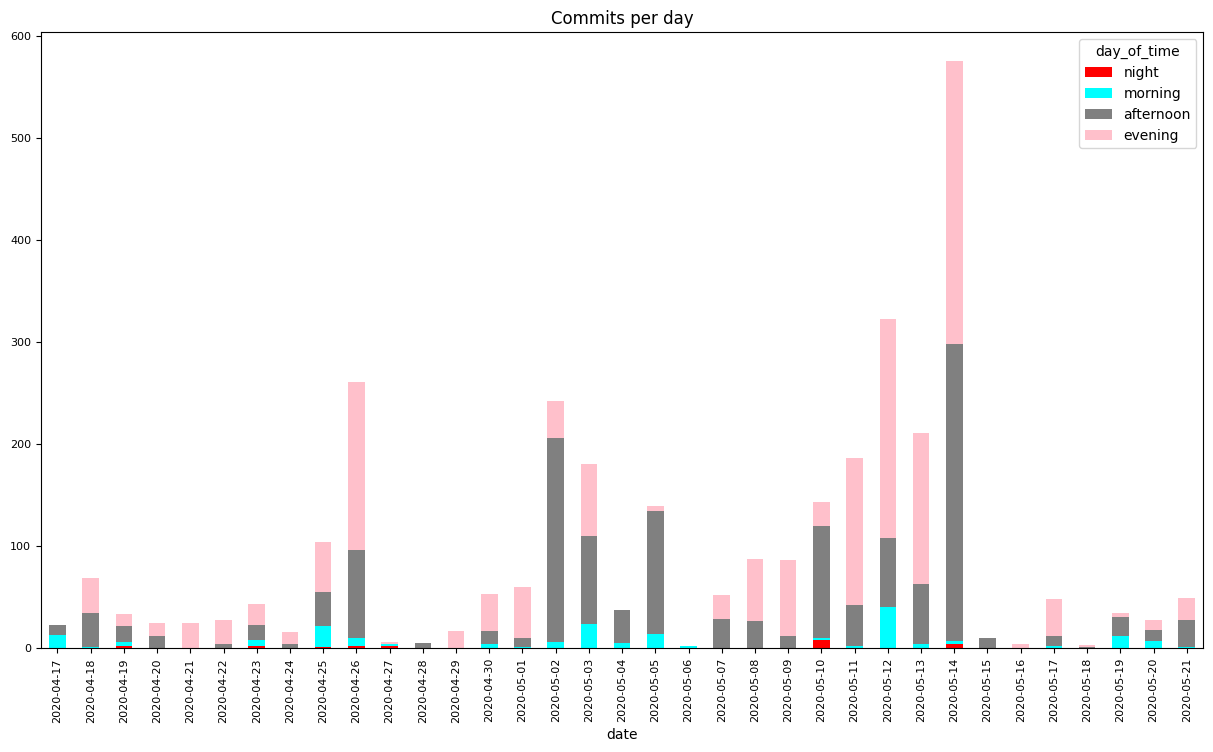

In [45]:
commits.plot(kind='bar', stacked=True, fontsize=8, figsize=(15, 8), title='Commits per day',
             color=['red', 'cyan', 'gray', 'pink'])

## 3

When do our users usually commit to the labs: in the night, morning, afternoon, or evening? - The two most common periods are afternoon and evening

Which day has: the most number of commits? - May 14
And at the same time, is the number of commits higher in the evening than in the afternoon? In the afternoon

## 4

In [46]:
conn.close()